In [20]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.spatial import Delaunay
#Alba

In [49]:
#1. Criar variáveis com medidas do retângulo para a malha.
#L=100mm; h=50mm

L=0.1 #Eixo x.
h=0.05 #Eixo y.
nb_element=3 #Entre os pontos mínimo/ máximo, gera 10 intervalos de nodes.

In [50]:
#2. Criar Nodes.

#Nodes=np.array([[0,0],[0,1],[1,0],[1,1]])

Nodes=[]

for x in np.linspace(0,L,num=nb_element):
    for y in np.linspace(0,h,num=nb_element):
        Nodes.append([x,y])
        
Nodes

[[0.0, 0.0],
 [0.0, 0.025],
 [0.0, 0.05],
 [0.05, 0.0],
 [0.05, 0.025],
 [0.05, 0.05],
 [0.1, 0.0],
 [0.1, 0.025],
 [0.1, 0.05]]

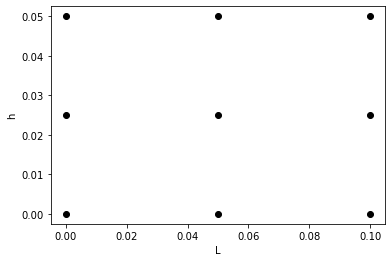

In [51]:
#3. Visualizar Nodes.
points=np.array(Nodes)

plt.plot(points[:,0],points[:,1],'o',color="Black")
plt.ylabel('h')
plt.xlabel('L')
plt.show()

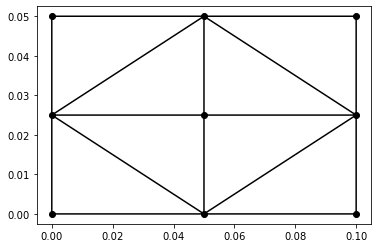

In [52]:
#3. Criar elementos da malha através da Triangulação de Delaunay.
tri=Delaunay(points) #Pontos de união dos triângulos.

plt.triplot(points[:,0],points[:,1],tri.simplices,color="Black") #tri.simplices contém uma matriz com os índices dos pontos de união dos triângulos.
plt.plot(points[:,0],points[:,1],'o',color="Black")
plt.show()

mesh=tri.simplices #Elementos.

In [65]:
#4. Exportar para ficheiro.

nb_nodes=len(points) #Calcular número de pontos da malha.
nb_elements=len(mesh) #Calcular o número de elementos da malha.

file=open("mesh.dat","w")

file.write("{}{} {}{}".format("$MeshFormat\n","2.2","0 8","\n$EndMeshFormat\n"))

file.write("{}\n".format("\n$Nodes"))
file.write("{}\n".format(nb_nodes))
for i,node in enumerate(Nodes): #Enumerate permite enumerar cada node. 
    file.write("{} {}\n".format(i,node[0],node[1]))
file.write("{}\n".format("$EndNodes\n"))

file.write("{}\n".format("\n$Elements"))
file.write("{}\n".format(nb_elements))
for j,element in enumerate(mesh):
    file.write("{} {} {}\n".format(j,element[0],element[1],element[2]))
file.write("{}\n".format("$EndElements\n"))

file.close()